In [ ]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


data_dict = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.shape

(9741, 42)

In [ ]:
np.unique(labels)

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '3', '4', '5',
       '6', '7', '8', '9'], dtype='<U2')

In [ ]:
len(np.unique(labels))

27

<ipython-input-5-9919e1c64824>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(name)


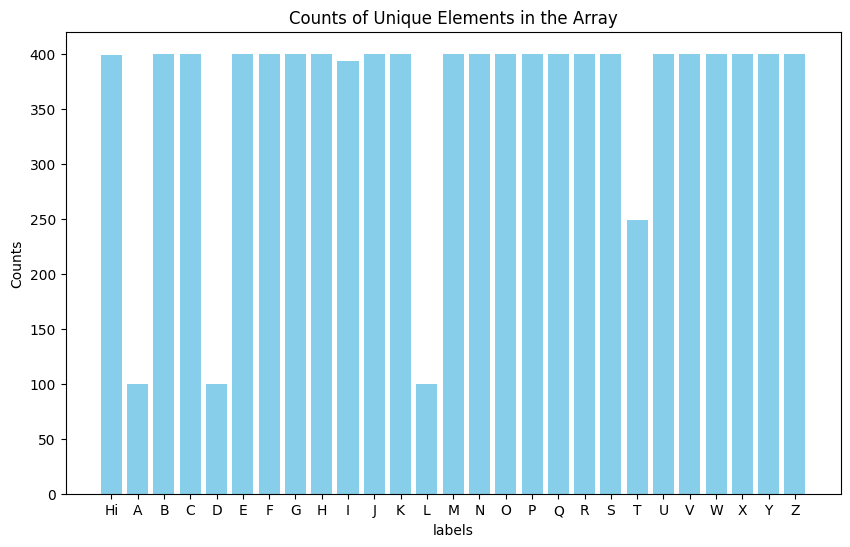

In [ ]:
import matplotlib.pyplot as plt
unique_elements, counts = np.unique(labels, return_counts=True)
name = ['Hi','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
# Step 2: Plot the counts using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique_elements, counts, color='skyblue')
plt.gca().set_xticklabels(name)

plt.xlabel('labels')
plt.ylabel('Counts')
plt.title('Counts of Unique Elements in the Array')
plt.xticks(unique_elements)  # Ensure all unique elements are displayed as ticks
plt.show()

In [ ]:
data.size

409122

In [ ]:
np.info(data)

class:  ndarray
shape:  (9741, 42)
strides:  (336, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x78a862d0b010
byteorder:  little
byteswap:  False
type: float64


In [ ]:
data[0]

array([0.17740612, 0.46399504, 0.24142997, 0.40711617, 0.29334147,
       0.33061886, 0.33460493, 0.27191919, 0.37613238, 0.23928595,
       0.21547572, 0.22120631, 0.24179713, 0.13706142, 0.26330818,
       0.08925831, 0.28073086, 0.0494968 , 0.17019625, 0.2164537 ,
       0.17136036, 0.11643559, 0.176259  , 0.05369672, 0.17841701,
       0.        , 0.12881692, 0.23588955, 0.10604982, 0.14357889,
       0.09273328, 0.08254582, 0.08365892, 0.02748901, 0.09183972,
       0.27644926, 0.05062743, 0.22410205, 0.02247526, 0.18733636,
       0.        , 0.14904842])

In [ ]:
data[9740]

array([0.03103444, 0.28017002, 0.07624602, 0.25688887, 0.11720645,
       0.2054233 , 0.11158353, 0.15435314, 0.07712603, 0.14789534,
       0.08924666, 0.14640945, 0.09931731, 0.11374235, 0.08969724,
       0.15561908, 0.07851753, 0.18631333, 0.06093034, 0.1373626 ,
       0.06585413, 0.10862076, 0.06159988, 0.16232938, 0.05657133,
       0.19865096, 0.03305751, 0.13513571, 0.0392122 , 0.10439712,
       0.03994709, 0.15769154, 0.03685725, 0.20149785, 0.00363812,
       0.13776368, 0.        , 0.07667488, 0.00137007, 0.03603423,
       0.00409225, 0.        ])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("RandomForest Accuracy:",accuracy_score(y_test, y_predict )*100,"%")

RandomForest Accuracy: 99.74345818368394 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd



knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy*100 ,"%\n")


# Reduce the dimensionality of the test set for visualization purposes
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test)

# Create a DataFrame for visualization
df = pd.DataFrame(x_test_pca, columns=['PC1', 'PC2'])
df['True Class'] = y_test
df['Predicted Class'] = y_pred

# Define unique colors and symbols for 27 classes
colors = px.colors.qualitative.Alphabet
symbols = [
    'circle', 'square', 'diamond', 'cross', 'x', 'star-triangle-up-dot',
    'triangle-up', 'triangle-down', 'triangle-left', 'triangle-right',
    'pentagon', 'hexagon', 'hexagon2', 'star', 'diamond-tall',
    'diamond-wide', 'hourglass', 'bowtie', 'asterisk', 'hash',
    'triangle-ne', 'triangle-se', 'triangle-sw', 'triangle-nw',
    'star-triangle-up', 'star-triangle-down', 'star-square'
]
print(len(symbols))
# Create the scatter plot
fig = px.scatter(
    df, x='PC1', y='PC2',
    color=df['Predicted Class'].astype(str),  # Convert to string for better color mapping
    symbol=df['True Class'].astype(str),  # Convert to string for better symbol mapping
    color_discrete_sequence=colors,
    symbol_sequence=symbols,
    labels={'symbol': 'True Class', 'color': 'Predicted Class'}
)

fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

KNN Accuracy: 98.15289892252437 %

27


In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred_SVM = clf.predict(x_test)
print("SVM Accuracy:",accuracy_score(y_test, y_pred_SVM )*100,"%")


SVM Accuracy: 99.28168291431503 %


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=27)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
print("LogisticRegression Accuracy:",accuracy_score(y_test, y_pred_logreg),"%\n")

LogisticRegression Accuracy: 0.9553617239610056 %



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.metrics import classification_report

reports = {}
report = classification_report(y_test, y_predict, output_dict=True)
reports['RandomForest'] = report


report = classification_report(y_test, y_pred_SVM, output_dict=True)
reports['SVM'] = report

report = classification_report(y_test, y_pred_logreg, output_dict=True)
reports['LogisticRegression'] = report

report = classification_report(y_test, y_pred, output_dict=True)
reports['KNN'] = report

In [ ]:
df_list = []
for name, report in reports.items():
    df = pd.DataFrame(report).transpose()
    df['Classifier'] = name
    df_list.append(df)

In [ ]:
all_reports_df = pd.concat(df_list)

all_reports_df.reset_index(inplace=True)

print(all_reports_df)

            index  precision    recall  f1-score      support    Classifier
0               0   1.000000  0.987500  0.993711    80.000000  RandomForest
1               1   1.000000  1.000000  1.000000    20.000000  RandomForest
2              10   1.000000  0.987500  0.993711    80.000000  RandomForest
3              11   1.000000  1.000000  1.000000    80.000000  RandomForest
4              12   1.000000  1.000000  1.000000    20.000000  RandomForest
..            ...        ...       ...       ...          ...           ...
115             8   1.000000  0.950000  0.974359    80.000000           KNN
116             9   1.000000  1.000000  1.000000    80.000000           KNN
117      accuracy   0.981529  0.981529  0.981529     0.981529           KNN
118     macro avg   0.983956  0.982222  0.982453  1949.000000           KNN
119  weighted avg   0.982860  0.981529  0.981496  1949.000000           KNN

[120 rows x 6 columns]


In [ ]:
all_reports_df.drop('index', axis=1, inplace=True)
avg_df = all_reports_df.groupby('Classifier').mean()
print(avg_df)

                    precision    recall  f1-score     support
Classifier                                                   
KNN                  0.983839  0.982176  0.982390  194.932718
LogisticRegression   0.962382  0.940765  0.946004  194.931845
RandomForest         0.997456  0.997668  0.997541  194.933248
SVM                  0.993435  0.986990  0.989513  194.933094


<Axes: xlabel='Classifier'>

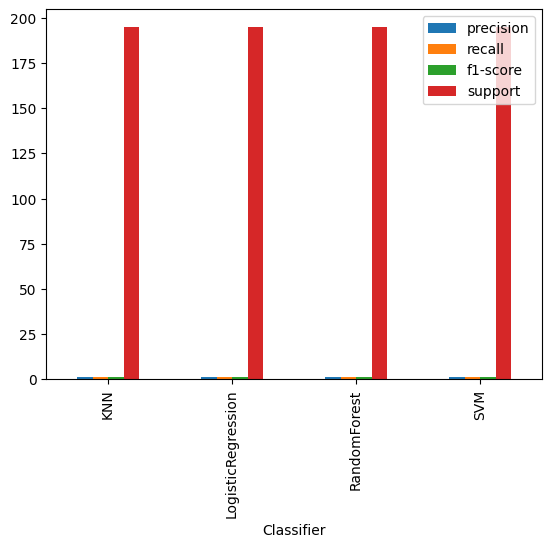

In [ ]:
avg_df.plot(kind='bar')

In [ ]:
avg_df.sort_values(by='f1-score', ascending=False)

,precision,recall,f1-score,support
Classifier,,,,
RandomForest,0.997456,0.997668,0.997541,194.933248
SVM,0.993435,0.986990,0.989513,194.933094
KNN,0.983839,0.982176,0.982390,194.932718
LogisticRegression,0.962382,0.940765,0.946004,194.931845


from matplotlib import pyplot as plt
_df_0['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
avg_df.sort_values(by='support', ascending=False)

,precision,recall,f1-score,support
Classifier,,,,
RandomForest,0.997456,0.997668,0.997541,194.933248
SVM,0.993435,0.986990,0.989513,194.933094
KNN,0.983839,0.982176,0.982390,194.932718
LogisticRegression,0.962382,0.940765,0.946004,194.931845


from matplotlib import pyplot as plt
_df_11['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

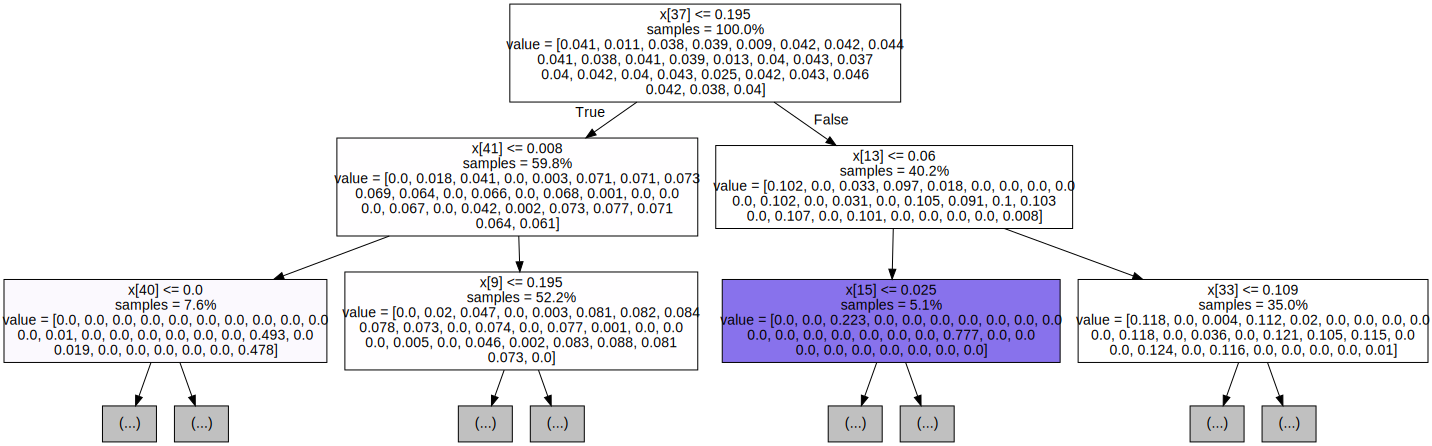

'decision_tree.jpg'

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

tree = model.estimators_[0]
dot_data = export_graphviz(tree,
                               filled=True,
                               impurity=False,
                           max_depth=2,
                               proportion=True)
graph = graphviz.Source(dot_data)
display(graph)
graph.render("decision_tree", format="jpg")


In [ ]:
f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()